In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

11.1. Простий поріг

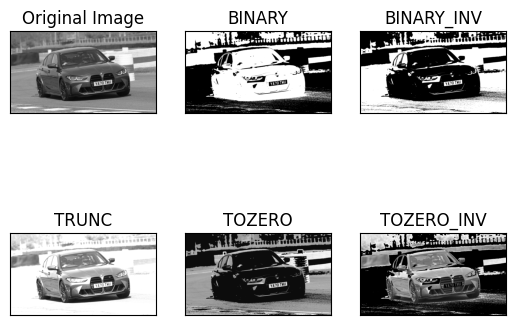

In [3]:
img = cv.imread(r'E:\KHPI\Computer Vision\Lab_11\pics\12.jpg', 0)

-, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
-, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
-, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
-, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
-, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1+12, thresh2+12, thresh3+12, thresh4+12, thresh5+12]
for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.xticks([]), plt.yticks([])
plt.show()

11.2. Адаптивний поріг

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread(r'E:\KHPI\Computer Vision\Lab_11\pics\12.jpg', 0)
img = cv2.resize(image, (int(image.shape[1] * 40 / 100), int(image.shape[0] * 40 / 100)), interpolation=cv2.INTER_AREA)

img= cv2.medianBlur (img, 5)
cv2.imshow('orig', img)
ret1, th1 =cv2.threshold (img, 127, 255, cv2. THRESH_BINARY)
th2= cv2.adaptiveThreshold (img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2. THRESH_BINARY, 11,2)
th3= cv2.adaptiveThreshold (img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussi- an Thresholding']
images= [img, th1, th2, th3]
cv2.imshow('th1',th1)
cv2.imshow('th2', th2)
cv2.imshow('th3', th3)
cv2.waitKey(0)
cv2.destroyAllWindows()

Завдання 11.3. На вхід програми порогової обробки подаєся зашумлене зображення. Це зображення обробляється трьома способами. У першому випадку використовується глобальний поріг зі значенням 127. У другому випадку безпосередньо застосовується поріг Оцу. У третьому випадку зображення спочатку видаляє шум фільтром з гаусовим ядром 5х5, потім застосовується порогова обробка Оцу. Зробити аналіз того, як фільтрація шуму покращує результат.

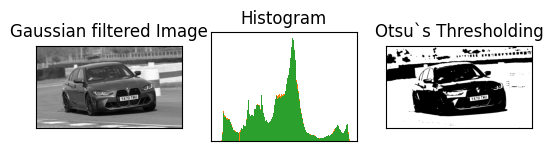

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r'E:\KHPI\Computer Vision\Lab_11\pics\12.jpg', 0)
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # [лoбaль- ная обработка
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # обрабomka Otsu
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255,
                          cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # обработка Otsu's после фильтра Гаусса images [img, 0, th1,
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)', 'Original Noisy Image', 'Histo- gram',
          "Otsu's Thresholding", 'Gaussian filtered Image', 'Histogram', "Otsu`s Thresholding"]
for i in range(3):
    plt.subplot(3, 3, 1 * 3 + 1), plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, 1 * 3 + 2), plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1]), plt.xticks([]),
    plt.yticks([])
    plt.subplot(3, 3, 1 * 3 + 3), plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2]), plt.xticks([]),
    plt.yticks([])
plt.show()